In [1]:
# Analysis of ENCUT Scan

In [50]:
import pymatgen as mg
from pymatgen.io.vasp.outputs import * 
import matplotlib.pyplot as plt
import os
import glob


In [51]:
# Loop through subdirs and extract data: 
# glob is a usefull tool that allows for linux wildcard searches
# we will search for the vasprun file in each subdir and create a list...
mylist = glob.glob('run_*/vasprun.xml')
mylist

['run_800/vasprun.xml',
 'run_700/vasprun.xml',
 'run_200/vasprun.xml',
 'run_300/vasprun.xml',
 'run_900/vasprun.xml',
 'run_400/vasprun.xml',
 'run_600/vasprun.xml',
 'run_500/vasprun.xml']

In [52]:
# We will then loop through the list, pulling the important data we need from each run in the list: 
E0 = [] # empty list for placing energy E0 and ENCUT value   
encut_list = [] 
EvEncut = [] 
for i in mylist:
    vr = Vasprun(i)
    eng = vr.final_energy
    enc = int(vr.incar['ENCUT'])
    EvEncut.append([enc,eng])
    E0.append(vr.final_energy)
    encut_list.append(int(vr.incar['ENCUT'])) 
    

In [53]:
EvEncut

[[800, -20.88103053],
 [700, -20.88093817],
 [200, -20.87503124],
 [300, -20.87956131],
 [900, -20.88110188],
 [400, -20.88032718],
 [600, -20.88083129],
 [500, -20.88075237]]

In [56]:
EvEncut.sort(key=lambda x : x[0])
EvEncut

[[200, -20.87503124],
 [300, -20.87956131],
 [400, -20.88032718],
 [500, -20.88075237],
 [600, -20.88083129],
 [700, -20.88093817],
 [800, -20.88103053],
 [900, -20.88110188]]

In [69]:
data = np.array(EvEncut)
encut = data[:,0]
E0 = data[:,1]
encut
E0

array([-20.87503124, -20.87956131, -20.88032718, -20.88075237,
       -20.88083129, -20.88093817, -20.88103053, -20.88110188])

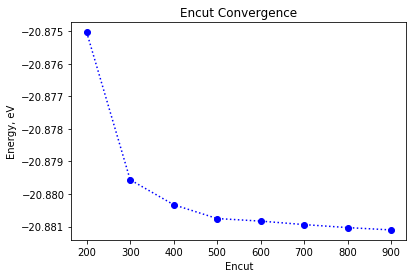

In [81]:
plt.plot(encut,E0,':b',marker='o')
plt.xlabel('Encut')
plt.ylabel('Energy, eV')
plt.title('Encut Convergence')
plt.show() 

In [ ]:
# So a good ENCUT should be above 500... 